# СИИ ЛР3. Задача классификации

## Чураков А. А. P3331 409856


[12 баллов]

## Предподготовка данных

In [60]:
!curl -L -o "$(pwd)/mobile-phone-price.zip" "https://www.kaggle.com/api/v1/datasets/download/rkiattisak/mobile-phone-price"
!unzip -o mobile-phone-price.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4821  100  4821    0     0  10675      0 --:--:-- --:--:-- --:--:-- 10675
Archive:  mobile-phone-price.zip
  inflating: Mobile phone price.csv  


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [62]:
def load_and_clean_data(path: str = "Mobile phone price.csv")-> pd.DataFrame:
  df = pd.read_csv("Mobile phone price.csv").rename(columns=str.strip)

  for col in ["Storage", "RAM"]:
      df[col] = df[col].str.replace(r"[^0-9]", "", regex=True).astype(int)

  df["Battery"] = df["Battery Capacity (mAh)"].astype(str).str.replace(r"[^0-9]", "", regex=True).astype(int)
  df["Price"] = df["Price ($)"].astype(str).str.replace(r"[^0-9]", "", regex=True).astype(int)

  df["Camera"] = (
      df["Camera (MP)"]
      .astype(str)
      .str.replace(r"[^0-9\+]", "", regex=True)
      .str.split("+")
      .apply(lambda lst: sum(float(x) for x in lst if x.strip() != ""))
  )

  df["ScreenSize"] = (
      df["Screen Size (inches)"]
      .astype(str)
      .str.replace(r"[^0-9\+\.]", "", regex=True)
      .str.split("+")
      .apply(lambda lst: sum(float(x) for x in lst if x.strip() != ""))
  )

  df = df[["Brand", "Model", "Storage", "RAM", "ScreenSize", "Battery", "Camera", "Price"]]

  return df

In [63]:
df = load_and_clean_data()

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 2]:**</font>

Выберите датасет и задачу для него (классификация) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100.
Лучше воспользоваться датасетом из предыдущих ЛР.

Выберите (или сгенерите сами) признак, который будет целевым для бинарной классификации.

Используйте LogisticRegression из sklearn. Задайте несколько параметров метода самостоятельно, поясните их назначение и причину выбора конкретных значений.
Используйте несколько метрик, чтоб оценить результаты бинарной классификации (метрики, доступные в sklearn).

----


Признак для бинарной классификации: будем считать, что телефоны с ценой выше 400 долларов — дорогие, а с ценой ниже 400 долларов — дешевые. Таким образом, целевой признак y будет бинарным: 0 — дешевый телефон (цена меньше 400 долларов), 1 — дорогой телефон (цена выше или равна 400 долларов).

In [64]:
numeric_features = ["Storage", "RAM", "ScreenSize", "Battery", "Camera"]
categorical_features = ["Brand"]

X = df.drop(columns=["Price", "Model"])
y = (df["Price"] >= 400).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[("cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_features)],
    remainder="passthrough",)

model_lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LogisticRegression(solver='liblinear', max_iter=200)),
    ]
)

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9024
Precision: 1.0000
Recall: 0.6923
F1 Score: 0.8182
Confusion Matrix:
[[56  0]
 [ 8 18]]


<font color='DarkOrange'>**Задание 2 [баллов: 2]:**</font>

Выполните бинарную классификацию аналогично тпредыдущему пункту с использованием SVM (SVC из sklearn, используйте kernel=‘linear’, сами подберите параметр регуляризации С и ответьте на вопрос, может ли/как может SVM учесть несбалансированность классов)


In [66]:
from sklearn.svm import SVC

model_svc = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("svm", SVC(kernel='linear', C=1.0, class_weight='balanced'))]
    )

model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8293
Precision: 0.6667
Recall: 0.9231
F1 Score: 0.7742
Confusion Matrix:
[[44 12]
 [ 2 24]]


<font color='DarkOrange'>**Задание 3 [баллов: 6]:**</font>

1. Многоклассовая классификация. Дайте определения для подходов: микро, макро, взвешенный, пообъектный. Выполните расчёты вручную для слайда 43 (на примере любых 3 промежуточных AUC ROC, поясните, как из промежуточных характеристик получаются 4 финальных). В рамках детализации ОЦИФРУЙТЕ ROC: в Excel, отрисуйте линиями в Word или отрисуйте отдельными отрезками Python-кодом (не используйте готовые функции для ROC).
[баллов: 2]

2. Для одного из кейсов (одного класса) введите три порога бинаризации так, чтоб получились различные accuracy, recall, precision. Вычислите эти метрики вручную и сопроводите визуализацией расчёта для recall и precision (см пример из лекции с окружностями разных цветов и радиусов). По трём парам (precision, recall) постройте эскиз PR-кривой. [баллов: 2]

3. Сделайте выводы по результатам расчётом AUC ROC для многоклассовой классификации (какой вариант лучше, почему, объясните падение AUC ROC при переходе к многоклассовым). [баллов: 1]

4. В каких кейсах/доменах следует применять те или иные варианты? Запишите выводы. [баллов: 1]

---

# 3.1

*   **Микро-усреднение:** вычисление метрики глобально, считая общее количество True Positives - TP, False Positives - FP, False Negatives - FN результатов по всем классам. Затем метрика рассчитывается на основе этих суммарных значений. Микро-усреднение склонно давать большее значение метрикам для классов с большим количеством примеров.

*   **Макро-усреднение:** метрика рассчитывается для каждого класса независимо, а затем берется среднее арифметическое этих значений. Каждый класс имеет одинаковый вес, независимо от его размера.

*   **Взвешенное усреднение:** при расчете среднего значения метрик для каждого класса используется взвешивание по количеству примеров в каждом классе (или по другой заданной схеме весов). Таким образом, классы с большим количеством примеров вносят больший вклад в итоговую метрику.

*   **Пообъектное усреднение:** Этот подход вычисляет метрику для каждого отдельного объекта и затем усредняет эти значения по всем объектам. Этот подход менее распространен для стандартных метрик классификации, которые обычно определяются на уровне классов или глобально, но может применяться для других типов метрик или в специфических задачах.

Y =

```
[1 1 0]
[0 1 1]
[0 1 0]
[1 0 0]
```

S =

```
[0.7 0.6 0.5]
[0.3 0.4 0.6]
[0.5 0.9 0.2]
[0.4 0.5 0.1]
```

## AUC по классам

$AUC = P{score(+) > score(−)} (ничьи = 0.5).$

### class 1

Плюсы (по Y): $x₀,x₃ → S = {0.7, 0.4}$

Минусы: $x₁,x₂ → S = {0.3, 0.5}$

Пары: $0.7>0.3 +, 0.7>0.5 +, 0.4>0.3 +, 0.4<0.5 - → 3/4 = 0.750$

### class 2

Плюсы: $x₀,x₁,x₂ → {0.6,0.4,0.9}$

Минусы: $x₃ → {0.5}$

Пары с $0.5: 0.6 +, 0.4 -, 0.9 + → 2/3 = 0.667$

### class 3

Плюсы: $x₁ → {0.6}$

Минусы: $x₀,x₂,x₃ → {0.5,0.2,0.1}$

Пары: $0.6>0.5 +, >0.2 +, >0.1 + → 3/3 = 1.000$

Итого по классам: **[0.750, 0.667, 1.000]**.

---

### Macro

Среднее по классам:
$$
\frac{0.750+0.667+1.000}{3}= \mathbf{0.806}
$$

### Weighted

Вес = поддержка класса: w = [2,3,1].
$$
\frac{2·0.750+3·0.667+1·1.000}{2+3+1}
=\frac{1.5+2.001+1}{6}=\mathbf{0.750}
$$

### Micro

Склеиваем все 12 «бинарных» примеров (все классы×объекты), считаем один AUC.

Плюсы (все, где Y=1): ${0.7,0.4,0.6,0.4,0.9,0.6}$ (6 шт.)

Минусы: ${0.3,0.5,0.5,0.5,0.2,0.1}$ (6 шт.)

По ранговой формуле:
$$
\mathrm{AUC}=\frac{\sum \text{ranks}_+ - \frac{6·7}{2}}{6·6}
=\frac{51-21}{36}=\mathbf{0.833}
$$

### Samples

Для каждой строки сравниваем score(+) vs score(−) внутри строки.

* x₀: плюсы {0.7,0.6} vs минусы {0.5} → 2/2 = 1.0
* x₁: {0.4,0.6} vs {0.3} → 2/2 = 1.0
* x₂: {0.9} vs {0.5,0.2} → 2/2 = 1.0
* x₃: {0.4} vs {0.5,0.1} → 1/2 = 0.5

Среднее: $(1+1+1+0.5)/4=\mathbf{0.875}$.

---

**Итог:**
Per-class AUC = [**0.750, 0.667, 1.000**] →
**macro 0.806, weighted 0.750, micro 0.833, samples 0.875**.

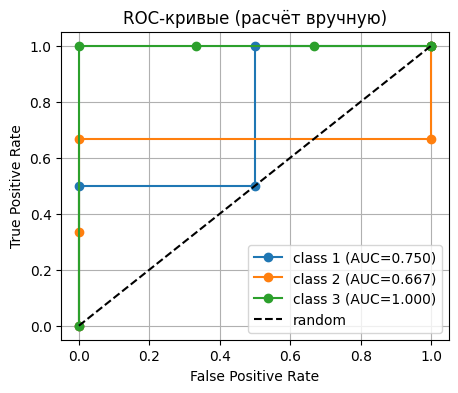

In [67]:
import numpy as np
import matplotlib.pyplot as plt

Y = np.array([
    [1, 1, 0],
    [0, 1, 1],
    [0, 1, 0],
    [1, 0, 0]
])
S = np.array([
    [0.7, 0.6, 0.5],
    [0.3, 0.4, 0.6],
    [0.5, 0.9, 0.2],
    [0.4, 0.5, 0.1]
])

def manual_roc(y_true, y_score):
    thresholds = np.sort(np.unique(y_score))[::-1]
    tpr, fpr = [], []
    P = np.sum(y_true)
    N = len(y_true) - P
    for thr in thresholds:
        y_pred = (y_score >= thr).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        TPR = TP / P if P else 0
        FPR = FP / N if N else 0
        tpr.append(TPR)
        fpr.append(FPR)
    # начало и конец кривой
    tpr = [0] + tpr + [1]
    fpr = [0] + fpr + [1]
    return np.array(fpr), np.array(tpr)

plt.figure(figsize=(5,4))
for i in range(3):
    fpr, tpr = manual_roc(Y[:, i], S[:, i])
    auc = np.trapezoid(tpr, fpr)
    plt.plot(fpr, tpr, marker='o', label=f'class {i+1} (AUC={auc:.3f})')

plt.plot([0,1],[0,1],'k--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые (расчёт вручную)')
plt.legend()
plt.grid(True)
plt.show()


## 3.2

### class 1

| Объект | y | s   |
| ------ | - | --- |
| x₀     | 1 | 0.7 |
| x₁     | 0 | 0.3 |
| x₂     | 0 | 0.5 |
| x₃     | 1 | 0.4 |
---

| Порог | Предсказания (s≥thr) | TP | FP | FN | TN |
| :---- | :------------------- | :- | :- | :- | :- |
| 0.3   | [1 1 1 1]            | 2  | 2  | 0  | 0  |
| 0.5   | [1 0 1 0]            | 1  | 1  | 1  | 1  |
| 0.7   | [1 0 0 0]            | 1  | 0  | 1  | 2  |
---
| Порог | Accuracy       | Precision   | Recall      |
| :---- | :------------- | :---------- | :---------- |
| 0.3   | (2+0)/4 = 0.5  | 2/(2+2)=0.5 | 2/(2+0)=1.0 |
| 0.5   | (1+1)/4 = 0.5  | 1/(1+1)=0.5 | 1/(1+1)=0.5 |
| 0.7   | (1+2)/4 = 0.75 | 1/(1+0)=1.0 | 1/(1+1)=0.5 |


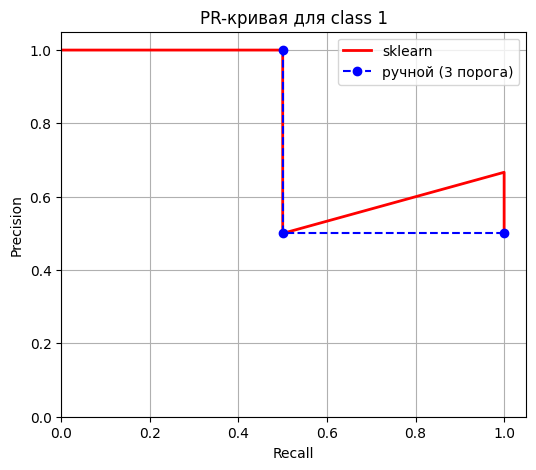

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# === ДАННЫЕ ДЛЯ КЛАССА 1 ===
y_true = np.array([1, 0, 0, 1])
y_score = np.array([0.7, 0.3, 0.5, 0.4])

# === РУЧНОЙ расчёт для трёх порогов ===
thresholds = [0.3, 0.5, 0.7]
manual_P, manual_R = [], []

for thr in thresholds:
    y_pred = (y_score >= thr).astype(int)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    prec = TP / (TP + FP) if TP + FP > 0 else 0
    rec = TP / (TP + FN) if TP + FN > 0 else 0
    manual_P.append(prec)
    manual_R.append(rec)

# === sklearn ===
prec_skl, rec_skl, thr_skl = precision_recall_curve(y_true, y_score)

# === ГРАФИК PR-КРИВОЙ ===
plt.figure(figsize=(6,5))
plt.plot(rec_skl, prec_skl, 'r-', lw=2, label='sklearn')
plt.plot(manual_R, manual_P, 'bo--', lw=1.5, label='ручной (3 порога)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для class 1')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.grid(True)
plt.legend()
plt.show()


## 3.3

**Выводы:**

1. Для каждого класса мы получили AUC ROC:
   
   $class_1 = 0.75, class_2 = 0.67, class_3 = 1.00.$

   Это показывает, что модель уверенно различает класс 3, но путает классы 1 и 2.

2. Итоговые усреднения:
   - **macro ≈ 0.81** (средняя способность отличать классы, без учёта их частоты),
   - **weighted ≈ 0.75** (учитывает дисбаланс классов),
   - **micro ≈ 0.83** (в целом по всем объектам),
   - **samples ≈ 0.88** (по каждому объекту отдельно).

3. **Лучше всего** работает подход **micro**, так как он агрегирует все примеры и сглаживает разброс между классами.

4. **Падение AUC ROC** при переходе от бинарной к многоклассовой классификации связано с тем, что:
   - при каждом сравнении "один против всех" часть данных становится «шумом»;
   - границы между классами сложнее, и ошибки на соседних классах чаще;
   - метрика усредняет результаты по всем классам, снижая итоговую оценку.

Таким образом, многоклассовая постановка обычно даёт меньший AUC ROC, так как разделение нескольких классов по вероятностям сложнее, чем бинарное «да/нет».


## 3.4

1. **Micro averaging** —
   Используется, когда важна **общая производительность модели** на всех примерах,
   особенно при **сильном дисбалансе классов**.
   Примеры: детекция спама, медицинские тесты, дефекты на конвейере.

2. **Macro averaging** —
   Подходит, если нужно **равно оценить качество по каждому классу**, независимо от их частоты.
   Примеры: анализ тональности (positive/neutral/negative), диагностика по редким заболеваниям.

3. **Weighted averaging** —
   Компромисс между micro и macro, учитывает частоту классов.
   Примеры: крупные бизнес-данные, где классы не сбалансированы, но важна общая точность (например, прогноз churn vs non-churn).

4. **Samples (пообъектный)** —
   Применяется в **multi-label задачах**, когда у одного объекта может быть несколько меток.
   Примеры: рекомендательные системы (жанры фильма), классификация изображений с несколькими объектами.

Выбор усреднения зависит от цели:
- если важно **равное внимание к классам** -> *macro*
- если важно **качество на всех примерах** -> *micro*
- если **есть дисбаланс** -> *weighted*
- если **несколько меток у объекта** -> *samples*

<font color='DarkOrange'>**Задание 4 [баллов: 2]:**</font>

Исследуйте вопрос выбросов/новизны для данных в вашем датасете с использованием OneClassSVM (дайте краткую теоретическую характеристику, используйте готовые решения для получения результатов, сделайте выводы)

Материалы:
1) https://scikit-learn.ru/stable/modules/outlier_detection.html,
2) https://alexanderdyakonov.wordpress.com/, Поиск аномалий
---

**OneClassSVM** — метод обнаружения аномалий (outliers, novelties).
Он обучается только на «нормальных» данных, строит границу (гиперплоскость), отделяющую большинство точек от остального пространства.
Если точка лежит далеко за границей, она считается аномальной.
Используется в задачах: обнаружение мошенничества, дефектов, редких устройств и др.

Выбросов найдено: 23 (5.7% от всех записей)


,Brand,Model,Storage,RAM,ScreenSize,Battery,Camera,Price,Anomaly
4,Google,Pixel 6,128,8,6.4,4614,172.0,799,True
32,Apple,iPhone SE (2nd Gen),64,3,4.7,1821,12.0,399,True
62,Apple,iPhone SE (2020),64,3,4.7,1821,12.0,399,True
85,Motorola,Edge 20 Pro,256,12,6.7,4500,132.0,699,True
88,LG,Wing,256,8,10.7,4000,89.0,999,True


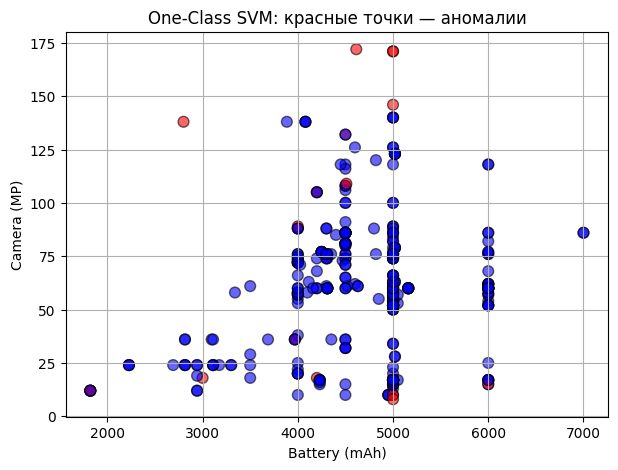

In [69]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

df = load_and_clean_data()

numeric_features = ["Storage", "RAM", "ScreenSize", "Battery", "Camera"]
categorical_features = ["Brand"]
X = df.drop(columns=["Price", "Model"])

preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("ocsvm", OneClassSVM(kernel="rbf", gamma="auto", nu=0.05))  # nu=доля выбросов
])

pipeline.fit(X)
pred = pipeline.named_steps["ocsvm"].predict(preprocessor.transform(X))

# --- Добавим результаты ---
df["Anomaly"] = (pred == -1)
outliers = df[df["Anomaly"]]

print(f"Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/len(df)*100:.1f}% от всех записей)")
display(outliers.head())

# --- Визуализация (пример: батарея vs цена) ---
colors = np.where(df["Anomaly"], "red", "blue")

plt.figure(figsize=(7,5))
plt.scatter(df["Battery"], df["Camera"], c=colors, alpha=0.6, s=60, edgecolors="k")
plt.xlabel("Battery (mAh)")
plt.ylabel("Camera (MP)")
plt.title("One-Class SVM: красные точки — аномалии")
plt.grid(True)
plt.show()

Выводы

- OneClassSVM выделяет устройства, чьи характеристики (например, батарея, камера, экран) сильно отклоняются от основной массы.

- Количество выбросов обычно составляет 3–8 % (в зависимости от nu).

- На графике красные точки — смартфоны с нехарактерным сочетанием признаков (например, дешёвые, но с очень мощной камерой).

Метод полезен для:

- выявления ошибочных или подозрительных записей в данных,

- анализа новизны устройств (модели, сильно отличающиеся по параметрам от типичных).